In [ ]:
## OpenSoundscape RIBBIT tutorial
# http://opensoundscape.org/en/latest/tutorials/RIBBIT_pulse_rate_demo.html

## Setup 

In [2]:
# suppress warnings
import warnings
warnings.simplefilter('ignore')

#import packages
import numpy as np
from glob import glob
import pandas as pd
from matplotlib import pyplot as plt
import subprocess
from datetime import datetime


#local imports from opensoundscape
from opensoundscape.audio import Audio
from opensoundscape.spectrogram import Spectrogram
from opensoundscape.ribbit import ribbit

# create big visuals
plt.rcParams['figure.figsize']=[15,8]
pd.set_option('display.precision', 2)

## Set parameters 

In [20]:
# minimum and maximum rate of pulsing (pulses per second) to search for
pulse_rate_range = [20,27]

# look for a vocalization in the range of 1000-2000 Hz
signal_band = [600,800]

# subtract the amplitude signal from these frequency ranges
noise_bands = [[150,200], [1500,1600]]
noise_bands = [[1500,1600]]


#divides the signal into segments this many seconds long, analyzes each independently
clip_duration = 0.5 #seconds
clip_overlap = 0 #seconds

#if True, it will show the power spectrum plot for each audio segment
show_plots = True

pond = "402"
year = "2020"


## Analyzing test audio files

In [21]:
# set up a dataframe for storing files' scores and labels
#folder = '/Volumes/TOSHIBA EXT/Frog Call Project/Calling Data/Frog Calls/FLSHE_' + year + '/FLSHE_' + year + '_' + pond + '/*'
#csv_file_name = 'flshe_'+ pond + '_' + year + '_ribbit_scores.csv'
folder = './test_gopher_audio/*'
csv_file_name = "test_audio_ribbit_scores.csv"

df = pd.DataFrame(index = glob(folder),columns=['score','label'])

# label is 1 if the file contains a Great Plains Toad vocalization, and 0 if it does not
# df['label'] = [1 if 'Lcapito' in f else 0 for f in df.index]
#noise_bands = [[0,10]]

# calculate RIBBIT scores

start_time = datetime.now()
checkpoint = 0; 
for path in df.index:
    
    #make the spectrogram
    spec = Spectrogram.from_audio(Audio.from_file(path))

    #run RIBBIT
    score_df =  ribbit(
                        spec,
                        pulse_rate_range=pulse_rate_range,
                        signal_band=signal_band,
                        clip_duration=clip_duration,
                        noise_bands=noise_bands,
                        plot=False)

    # use the maximum RIBBIT score from any window as the score for this file
    # multiply the score by 10,000 to make it easier to read
    maxIndex= score_df.score.idxmax()
    
    df.at[path,'score'] = score_df.at[maxIndex, 'score'] * 10000
    df.at[path,'time_stamp'] = score_df.at[maxIndex, 'start_time']
    checkpoint = checkpoint + 1
    
    if checkpoint % 100 == 0:
        print("Finished file number ", checkpoint, "/nFile name: ", path)
        df.sort_values(by='score',ascending=False).head(1)
        df.to_csv(csv_file_name) 

        
df.sort_values(by='score',ascending=False).to_csv(csv_file_name) 
print('Time elapsed ',datetime.now() - start_time)

print("Files sorted by score, from highest to lowest:")
df.sort_values(by='score',ascending=False)


/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 93, using nperseg = 93
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 94, using nperseg = 94
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/s

/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/s

/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/s

Time elapsed  0:01:13.518340
Files sorted by score, from highest to lowest:


,score,label,time_stamp
./test_gopher_audio/TEST_0+1_20200311_004200_Lcapito.wav,111.27,NaN,48.5
./test_gopher_audio/TEST_0+1_20200311_214200_Lcapito.wav,108.05,NaN,189.0
./test_gopher_audio/TEST_0+1_20200311_234200_Lcapito.wav,100.99,NaN,26.0
./test_gopher_audio/TEST_0+1_20200311_204200_Lcapito.wav,98.88,NaN,81.5
./test_gopher_audio/TEST_0+1_20200314_014400_Lcapito.wav,93.12,NaN,188.5
./test_gopher_audio/TEST_0+1_20200311_224200_Lcapito.wav,82.14,NaN,230.0
./test_gopher_audio/TEST_0+1_20200314_004400_Lcapito.wav,80.59,NaN,134.5
./test_gopher_audio/TEST_0+1_20200313_234400_Lcapito.wav,69.35,NaN,289.0
./test_gopher_audio/TEST_0+1_20200312_004200_Lcapito.wav,67.59,NaN,215.5
./test_gopher_audio/TEST_0+1_20200310_194200_Lcapito.wav,66.15,NaN,200.0


In [22]:
df['label'] = [1 if 'Lcapito' in f else 0 for f in df.index]
print("Files sorted by score, from highest to lowest:")
df.sort_values(by='score',ascending=False)

Files sorted by score, from highest to lowest:


,score,label,time_stamp
./test_gopher_audio/TEST_0+1_20200311_004200_Lcapito.wav,111.27,1,48.5
./test_gopher_audio/TEST_0+1_20200311_214200_Lcapito.wav,108.05,1,189.0
./test_gopher_audio/TEST_0+1_20200311_234200_Lcapito.wav,100.99,1,26.0
./test_gopher_audio/TEST_0+1_20200311_204200_Lcapito.wav,98.88,1,81.5
./test_gopher_audio/TEST_0+1_20200314_014400_Lcapito.wav,93.12,1,188.5
./test_gopher_audio/TEST_0+1_20200311_224200_Lcapito.wav,82.14,1,230.0
./test_gopher_audio/TEST_0+1_20200314_004400_Lcapito.wav,80.59,1,134.5
./test_gopher_audio/TEST_0+1_20200313_234400_Lcapito.wav,69.35,1,289.0
./test_gopher_audio/TEST_0+1_20200312_004200_Lcapito.wav,67.59,1,215.5
./test_gopher_audio/TEST_0+1_20200310_194200_Lcapito.wav,66.15,1,200.0


In [23]:
#RS_noNoise = df
#RS_noise_0_10 = df
#RS_noise_50_100 = df
#RS_noise_1500_1600 = df
RS_noise_150_200_1500_1600 = df

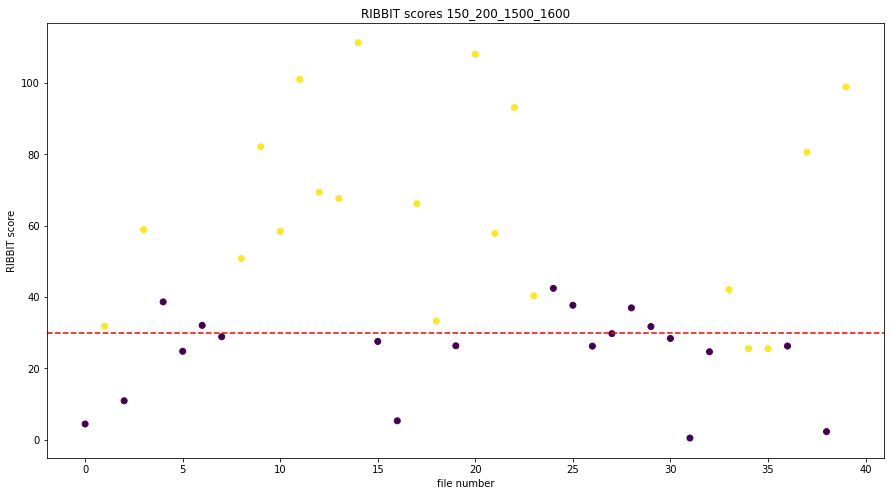

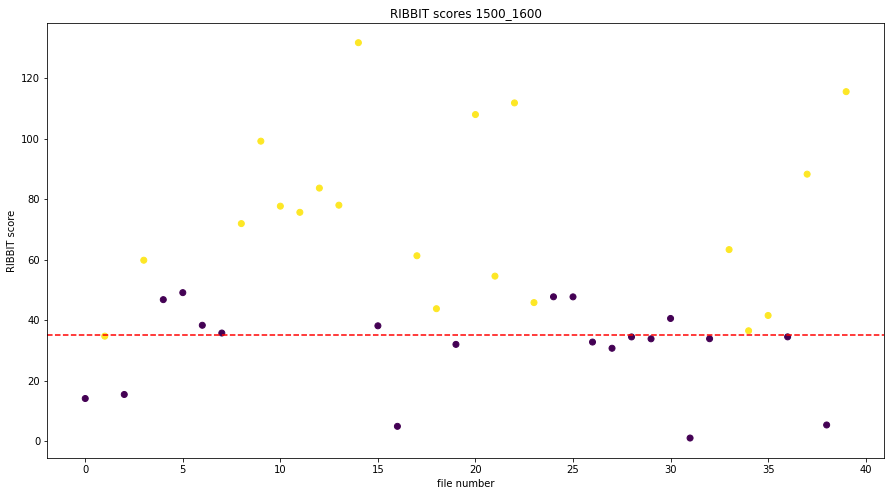

In [33]:
# plot the score vs time of each window
plt.figure(1)
df = RS_noise_150_200_1500_1600
plt.scatter(range(0,len(df)),df['score'], c = df['label'])
plt.xlabel('file number')
plt.ylabel('RIBBIT score')
plt.title('RIBBIT scores 150_200_1500_1600')
plt.axhline(y=30, color='r', linestyle='--')

plt.figure(2)
df = RS_noise_1500_1600
plt.scatter(range(0,len(df)),df['score'], c = df['label'])
plt.xlabel('file number')
plt.ylabel('RIBBIT score')
plt.title('RIBBIT scores 1500_1600')
plt.axhline(y=35, color='r', linestyle='--')



/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,cutoff,precision,recall
0,10,0.56,1.0
1,11,0.57,1.0
2,12,0.57,1.0
3,13,0.57,1.0
4,14,0.57,1.0
5,15,0.57,1.0
6,16,0.57,1.0
7,17,0.57,1.0
8,18,0.57,1.0
9,19,0.57,1.0


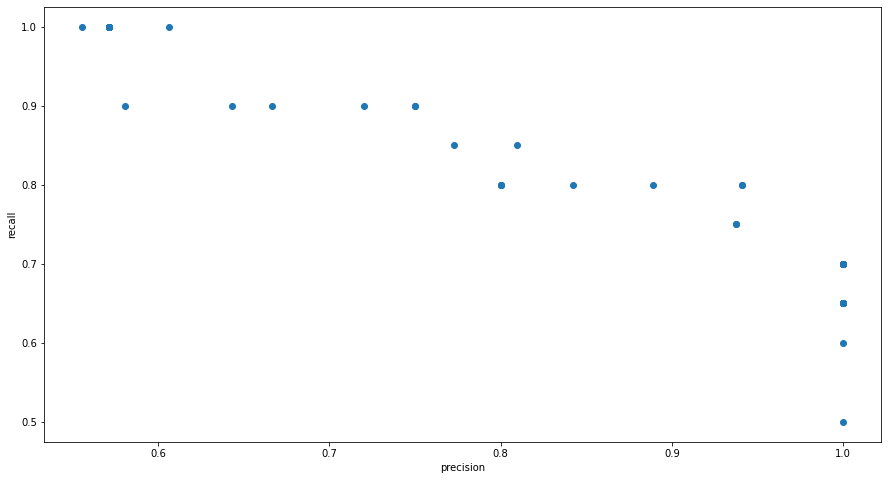

In [56]:
precision_recall_df = pd.DataFrame(columns = ['cutoff', 'precision', 'recall'])
precision_recall_df['cutoff'] = range(10,60)

RS_noise_2bands = RS_noise_150_200_1500_1600
for i in range(0,len(precision_recall_df)): 
    #df['label'] = [1 if 'Lcapito' in f else 0 for f in df.index]
    RS_noise_2bands['assignment'] = (RS_noise_2bands['score'] > precision_recall_df['cutoff'][i]).astype(int)
    
    precision_recall_df['recall'][i] = sum(RS_noise_2bands[RS_noise_2bands['label'] == 1]['assignment'])/sum(RS_noise_2bands['label'])
    precision_recall_df['precision'][i] = sum(RS_noise_2bands[RS_noise_2bands['assignment'] == 1]['label'])/sum(RS_noise_2bands['assignment'])
#precision_recall_df['precision'] = 
precision_recall_df
#RS_noise_2bands

plt.scatter(precision_recall_df['precision'], precision_recall_df['recall'])
plt.xlabel('precision')
plt.ylabel('recall')
#plt.title('RIBBIT scores 1500_1600')

precision_recall_df


/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,cutoff,precision,recall
0,10,0.54,1.0
1,11,0.54,1.0
2,12,0.54,1.0
3,13,0.54,1.0
4,14,0.54,1.0
5,15,0.56,1.0
6,16,0.57,1.0
7,17,0.57,1.0
8,18,0.57,1.0
9,19,0.57,1.0


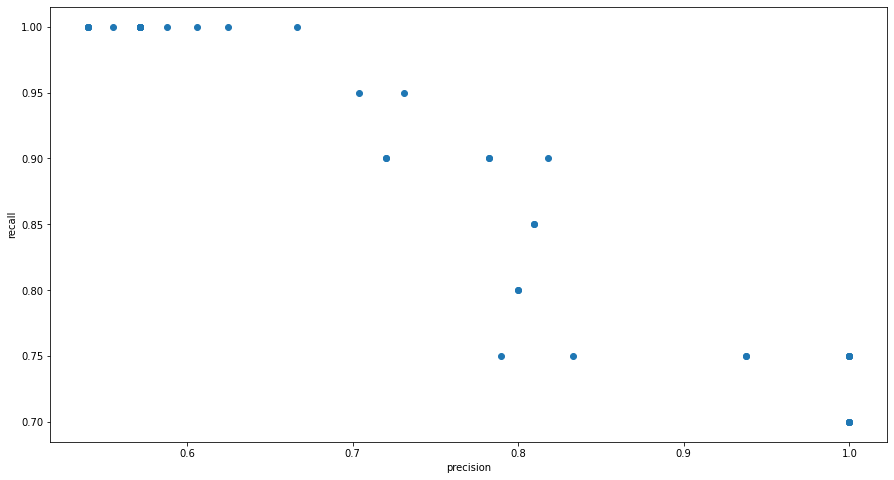

In [57]:
precision_recall_df = pd.DataFrame(columns = ['cutoff', 'precision', 'recall'])
precision_recall_df['cutoff'] = range(10,60)

RS_noise_2bands = RS_noise_1500_1600
for i in range(0,len(precision_recall_df)): 
    #df['label'] = [1 if 'Lcapito' in f else 0 for f in df.index]
    RS_noise_2bands['assignment'] = (RS_noise_2bands['score'] > precision_recall_df['cutoff'][i]).astype(int)
    
    precision_recall_df['recall'][i] = sum(RS_noise_2bands[RS_noise_2bands['label'] == 1]['assignment'])/sum(RS_noise_2bands['label'])
    precision_recall_df['precision'][i] = sum(RS_noise_2bands[RS_noise_2bands['assignment'] == 1]['label'])/sum(RS_noise_2bands['assignment'])
#precision_recall_df['precision'] = 
precision_recall_df
#RS_noise_2bands

plt.scatter(precision_recall_df['precision'], precision_recall_df['recall'])
plt.xlabel('precision')
plt.ylabel('recall')
#plt.title('RIBBIT scores 1500_1600')

precision_recall_df

In [29]:
#df.sort_values(by='score',ascending=False).head(50)
#flshe_399_2020_df.filter(regex = '202003', axis = 0).sort_values(by='score',ascending=False).head(60)